# Comparing marginal statistics with Linear regression

For prototyping `get_sumstats()` function in data object.

## Data simulation

Here I allow for presence of missing data. I load all packages to access some private functions.

In [1]:
devtools::load_all("/home/gaow/Documents/GIT/software/susieR")
devtools::load_all("/home/gaow/Documents/GIT/software/mmbr")

Loading susieR
Loading mmbr
Loading required package: mashr
Loading required package: ashr


In [2]:
set.seed(1)
dat = mmbr_sim1(100,100,5,4,center_scale=F,y_missing=0.5)

In [3]:
names(dat)

[1] "X"         "y"         "y_missing" "d"         "n"         "p"        
[7] "r"         "V"         "b"

In [4]:
resid_Y <- compute_cov_diag(dat$y)
resid_Y_miss <- compute_cov_diag(dat$y_missing)
alpha = 0

## Marginal stats with mmbr

Without and with missing data:

In [5]:
d1 = DenseData$new(dat$X, dat$y,center=T,scale=T)
res1 = d1$get_sumstats(diag(resid_Y), cov2cor(resid_Y), alpha)
z1 = res1$bhat/res1$sbhat0

In [6]:
d2 = DenseData$new(dat$X, dat$y_missing,center=T,scale=T)
res2 = d2$get_sumstats(diag(resid_Y_miss), cov2cor(resid_Y_miss), alpha)
z2 = res2$bhat/res2$sbhat0

## Marginal stats with `lm.fit`

In [7]:
z3 = susieR:::calc_z(dat$X, dat$y,center=T,scale=T)

In [8]:
z4 = susieR:::calc_z(dat$X, dat$y_missing,center=T,scale=T)

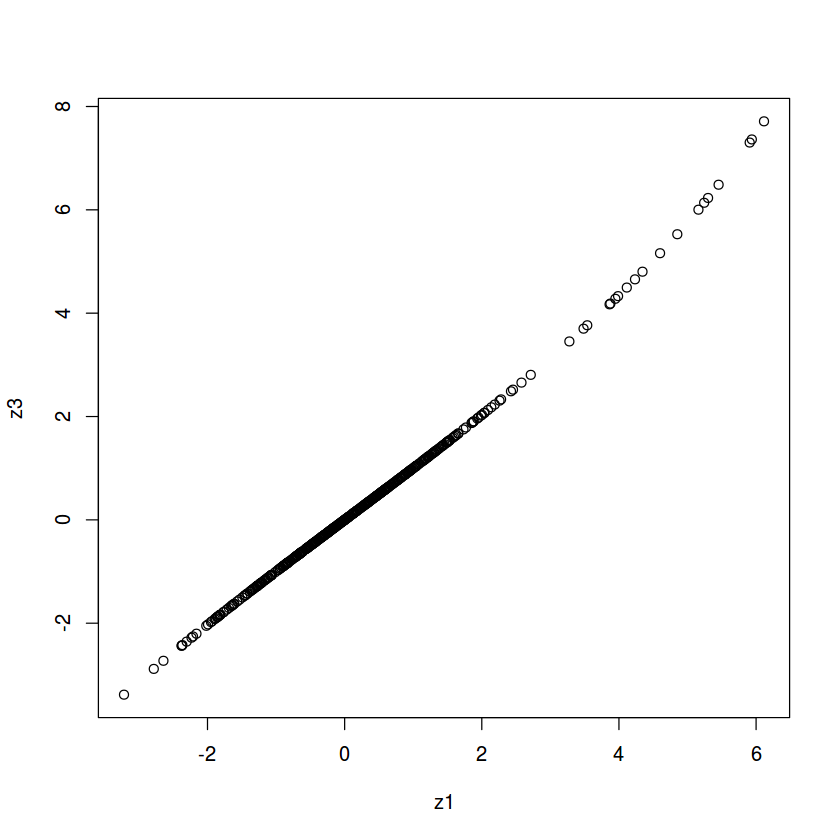

In [9]:
plot(z1,z3)

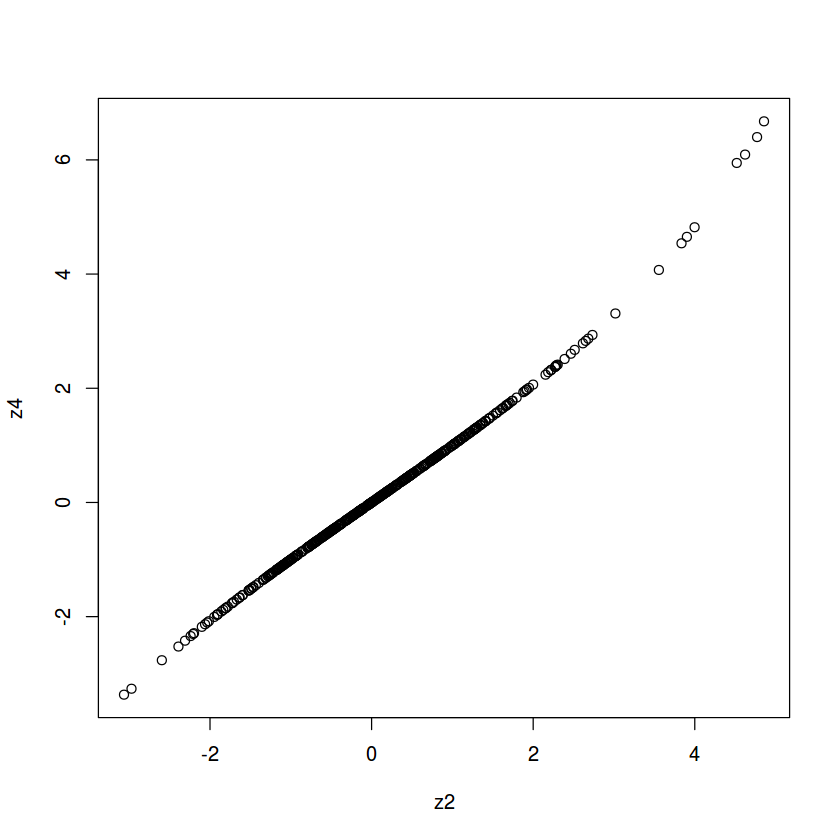

In [10]:
plot(z2,z4)

The are not exactly identical because here residual variance I put in is variance of `y` so it's going to be more conservative. Looking at one `y` for example and check `bhat` agreement:

In [11]:
res = univariate_regression(dat$X,dat$y[,1],center=T,scale=T)
head(res$betahat)

[1]  0.03130591 -0.01231710 -0.04794406  0.34991865  0.09134892 -0.43614226

In [12]:
head(res1$bhat[,1])

[1]  0.03130591 -0.01231710 -0.04794406  0.34991865  0.09134892 -0.43614226

In [13]:
head(res$sebetahat)

[1] 0.2361837 0.2362016 0.2361552 0.2335451 0.2360246 0.2320598

In [14]:
head(res1$sbhat0[,1])

[1] 0.2350089 0.2350089 0.2350089 0.2350089 0.2350089 0.2350089

`bhat` are identical but not `sebhat`. This is understandable. In unit tests I'll compare `bhat`.